In [23]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta


from scipy.stats import mstats
import japanize_matplotlib
from tqdm.notebook import tqdm


In [7]:
pd.read_csv('testdata/VNQdataframe.csv', index_col=0, parse_dates=True)

,signal,Return,totalreturn,profitline,loss_cut,interest,open_price
2011-01-01,1.0,0.030000,1.653900,crossed,safe,1.653900,55.130001
2011-02-01,1.0,-0.018007,0.603897,not crossed,safe,-1.050003,58.310001
2011-03-01,1.0,0.030000,2.287497,crossed,safe,1.683600,56.119999
2011-04-01,0.0,0.059211,5.707499,not crossed,safe,3.420002,57.759998
2011-05-01,1.0,-0.048753,2.717497,not crossed,safe,-2.990002,61.330002
...,...,...,...,...,...,...,...
2023-02-01,1.0,-0.120000,207.845690,not crossed,Losscut.,-10.856400,90.470001
2023-03-01,1.0,-0.006486,207.305689,not crossed,safe,-0.540001,83.260002
2023-04-01,0.0,0.030000,209.789089,crossed,safe,2.483400,82.779999
2023-05-01,1.0,0.030000,212.254189,crossed,safe,2.465100,82.169998


In [12]:
df_list = {}
for ticker in ['IYR', 'RWR', 'XLRE', 'VNQ']:
    df_list[ticker] = pd.read_csv('testdata/'+ticker+'dataframe.csv', index_col=0, parse_dates=True)

In [11]:
datelist = pd.date_range(start='2011-01-01', end='2023-06-01', freq='1MS')

In [43]:
datadict = {}
SET = set()
for i in tqdm(datelist):
    Asset, cum = 0, 0
    for ticker in ['IYR', 'RWR', 'XLRE', 'VNQ']:
        temp = df_list[ticker]
        try:
            temp2 = temp.loc[i.strftime('%Y-%m-%d'), :]
        except:
            continue
        if not temp.loc[i.strftime('%Y-%m-%d'), :].isna().any():
            SET.add(ticker)
        Asset += temp2['open_price']
        cum += temp2['interest']
        
    Return = cum / Asset
    datadict.update({i:[Return, SET]})

  0%|          | 0/150 [00:00<?, ?it/s]

In [50]:
df

,Return,Ticker
2011-01-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2011-02-01,-0.013714,"{XLRE, IYR, VNQ, RWR}"
2011-03-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2011-04-01,0.054466,"{XLRE, IYR, VNQ, RWR}"
2011-05-01,-0.047336,"{XLRE, IYR, VNQ, RWR}"
...,...,...
2023-02-01,-0.123374,"{XLRE, IYR, VNQ, RWR}"
2023-03-01,-0.003777,"{XLRE, IYR, VNQ, RWR}"
2023-04-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2023-05-01,0.017266,"{XLRE, IYR, VNQ, RWR}"


In [45]:
df = pd.DataFrame.from_dict(datadict, orient='index',columns=['Return', 'Ticker'])

単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 14.412 %


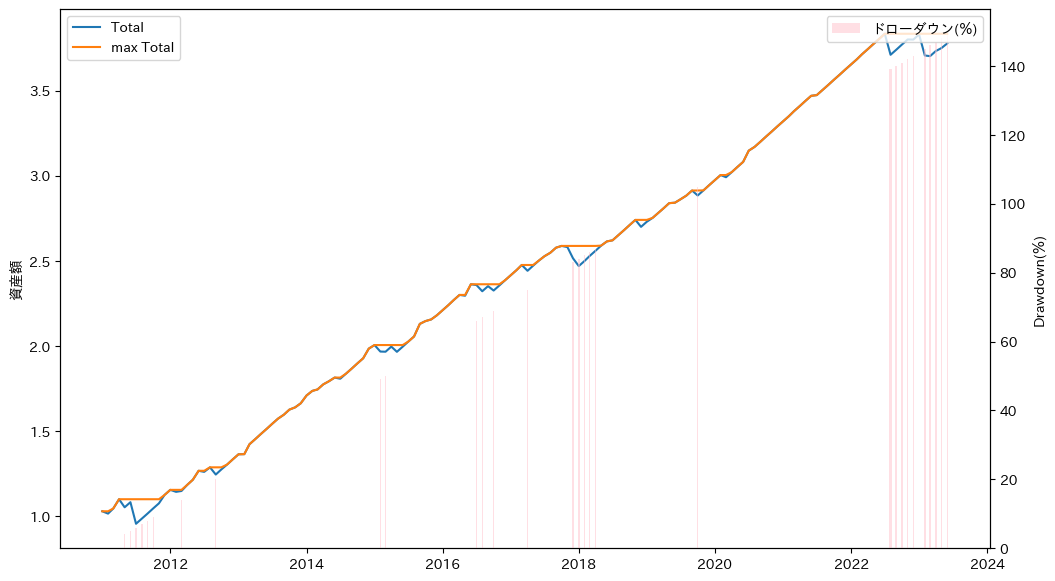

In [53]:
print("単利計算です。各y値は、その時点までの各利率の累積です。")
temp = df["Return"].values



profit_month = np.array(temp)

# 単利運用での資産額の計算
total = 1 + np.cumsum(profit_month)

# 月ごとのそれまでの最大資産の計算
max_assets = pd.Series(total).cummax().values

# ドローダウンの計算
dd = max_assets - total

# 最大ドローダウンの計算
max_dd_percent = max(dd) * 100
print(f'最大ドローダウン: {max_dd_percent:.3f} %')

fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

ax1.set_ylabel('資産額')
ax1.plot(df.index,total, label='Total')
ax1.plot(df.index, max_assets, label='max Total')
ax1.legend()

ax2.set_ylabel('Drawdown(％)')
ax2.bar(df.index, np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
ax2.legend(loc='upper right')
plt.savefig('graph_image/summation_distribution.png')